In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
from skimage import measure, feature
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
def read_image(path='./single/101_0119.JPG'):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray,5)
    return blur

In [3]:
name = []
whole_features = []
images = []
for image in os.listdir("./single/"):
    img = read_image(path=f"./single/{image}")
    images.append(img)
    name.append(image)

In [6]:
for img in images :
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    cv2.imshow('res2',res2)
    cv2.imwrite('k3.png',res2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

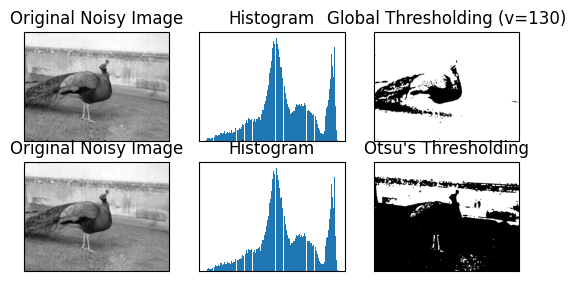

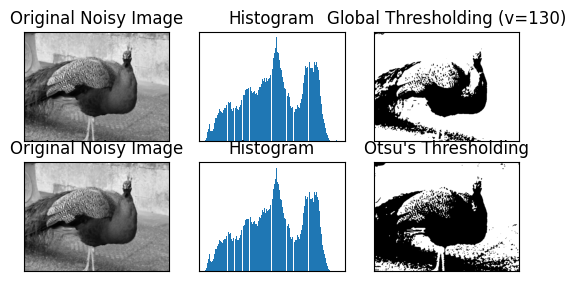

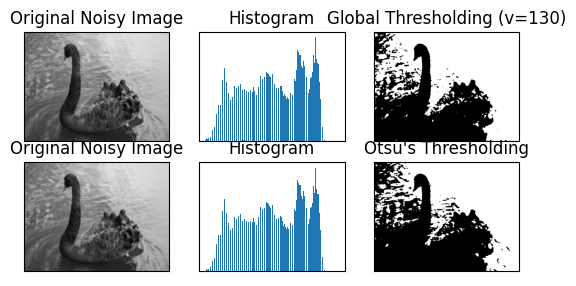

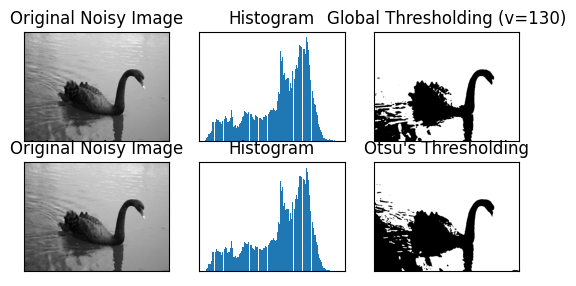

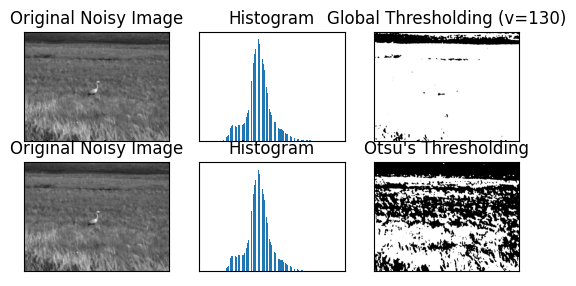

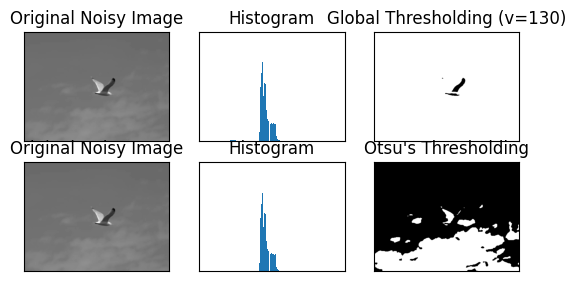

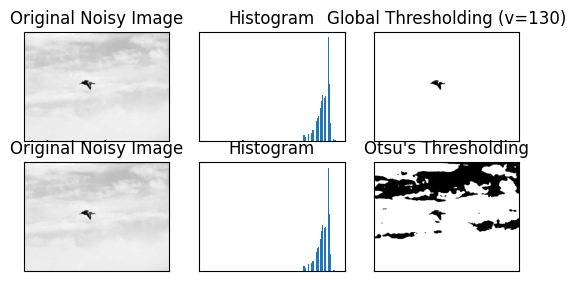

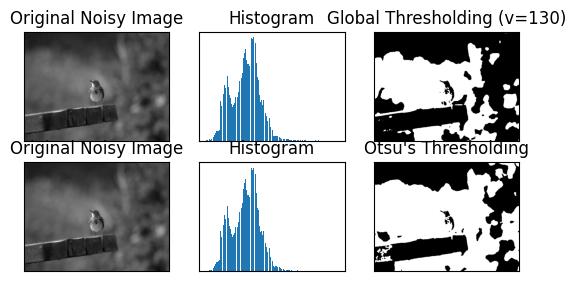

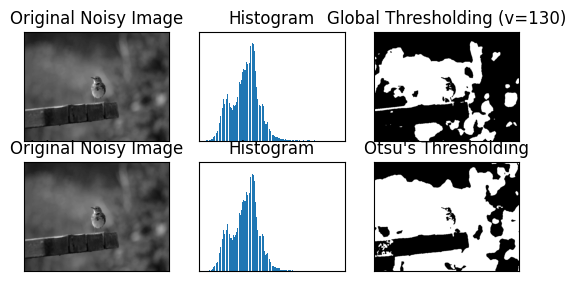

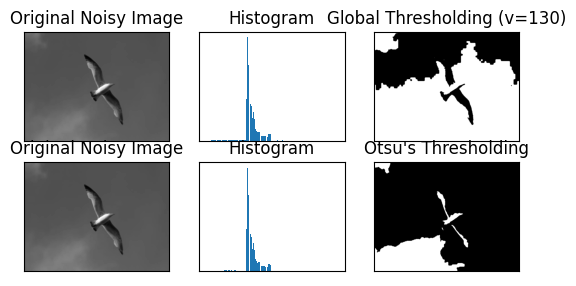

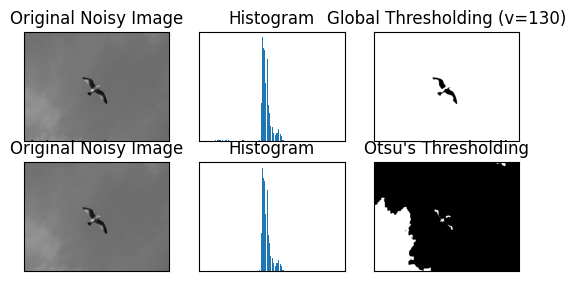

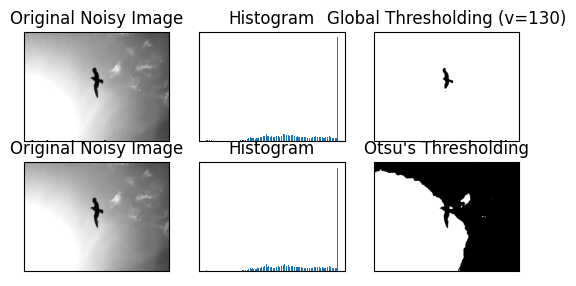

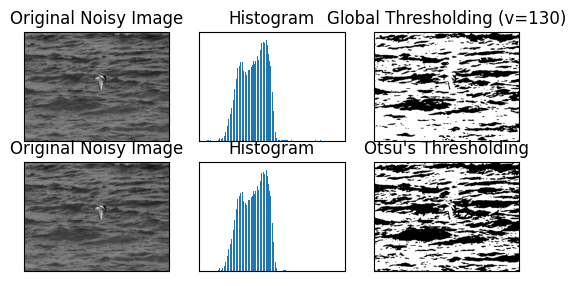

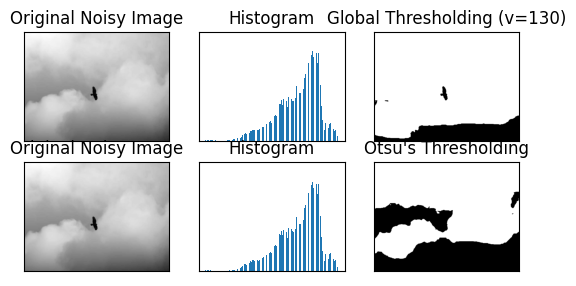

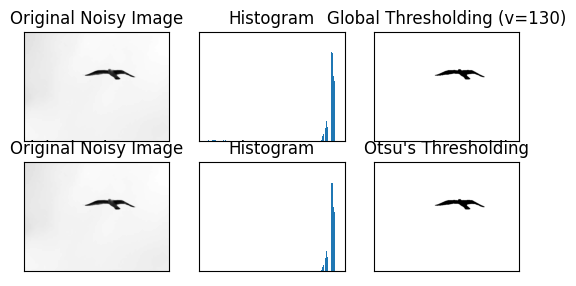

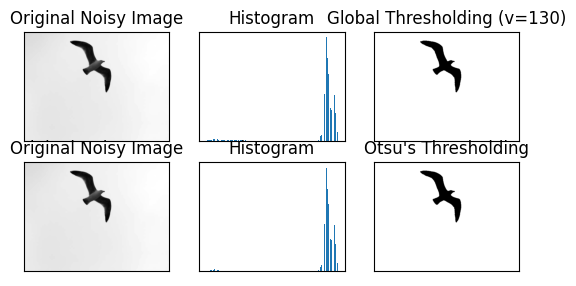

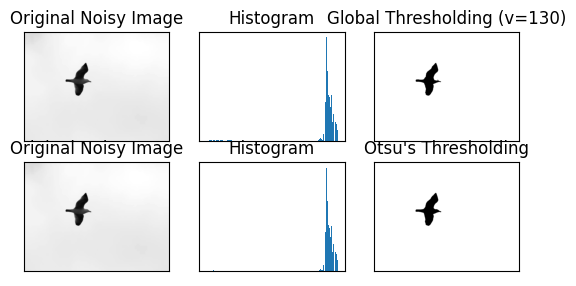

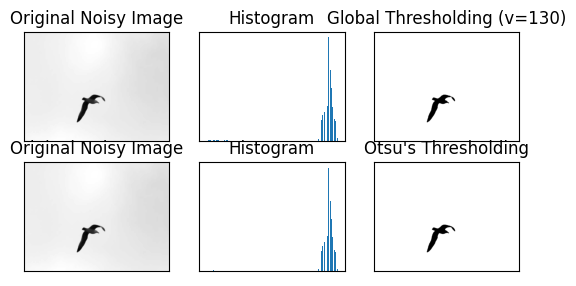

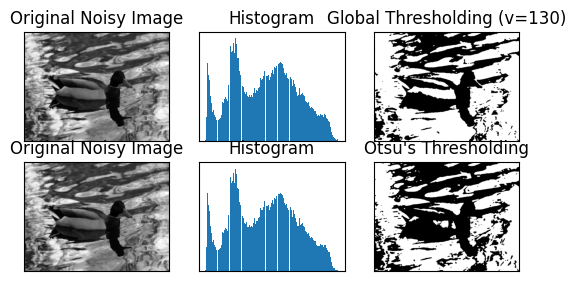

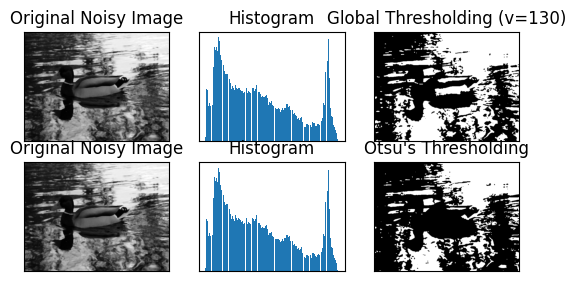

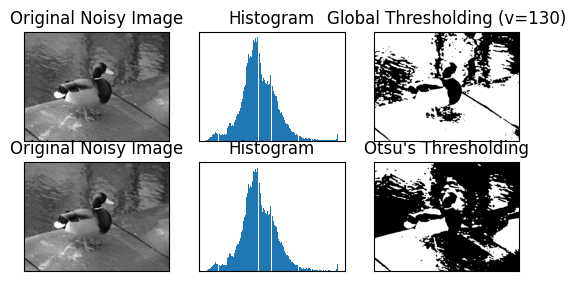

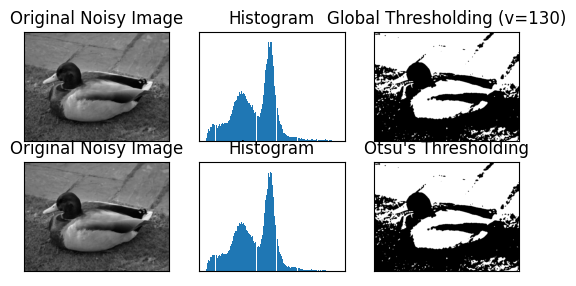

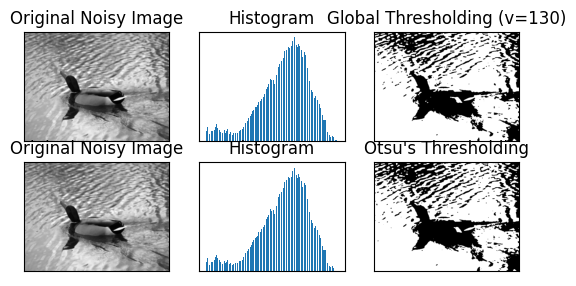

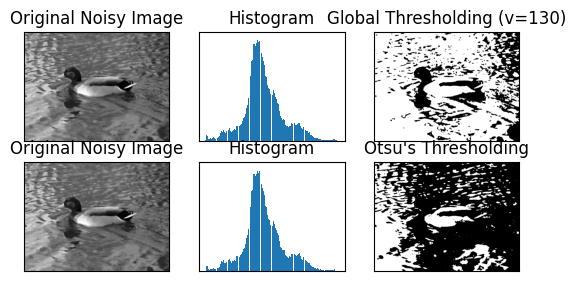

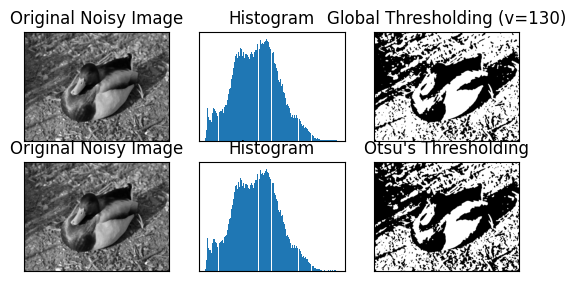

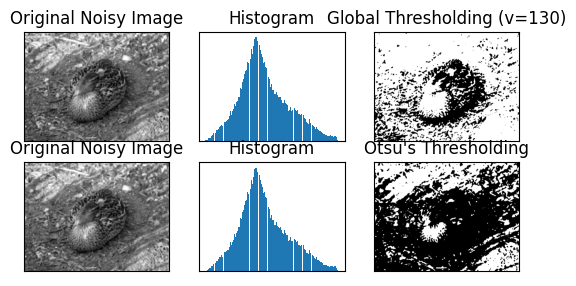

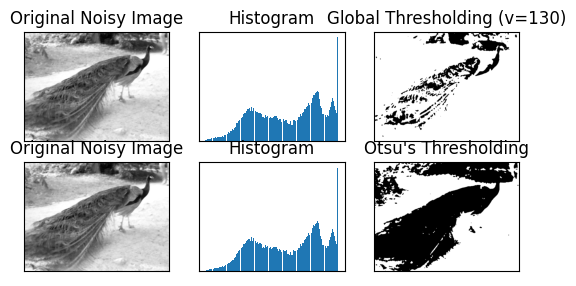

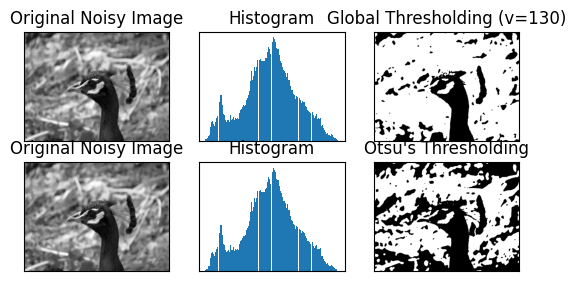

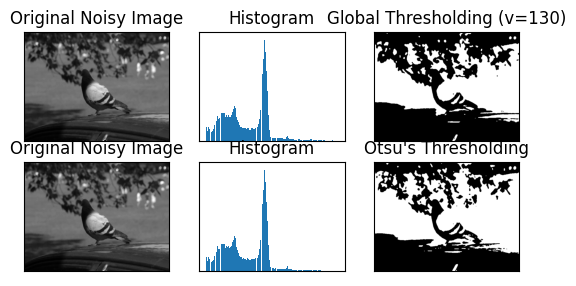

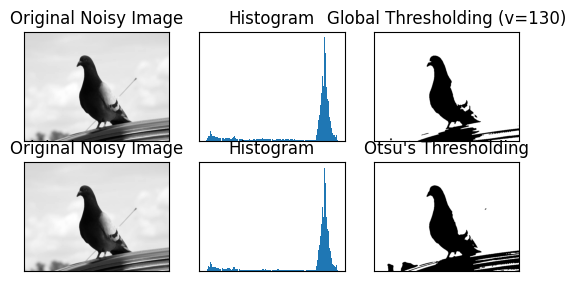

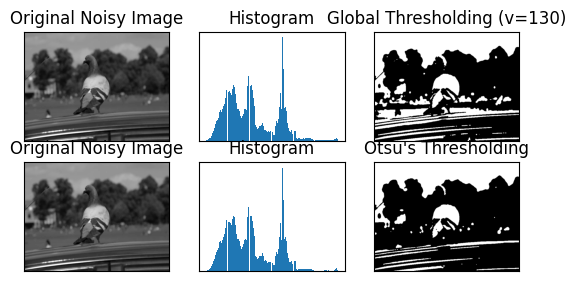

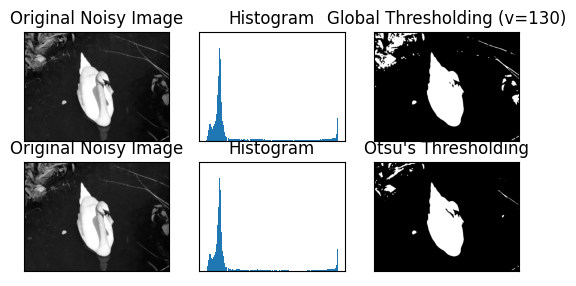

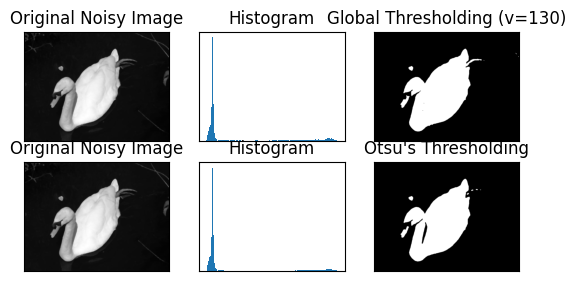

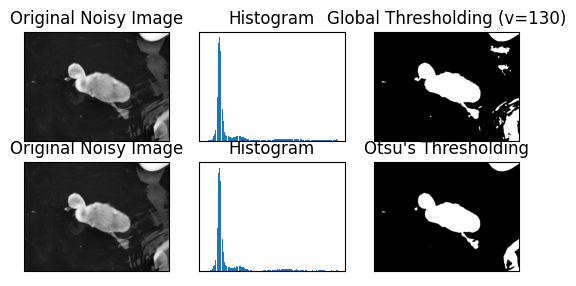

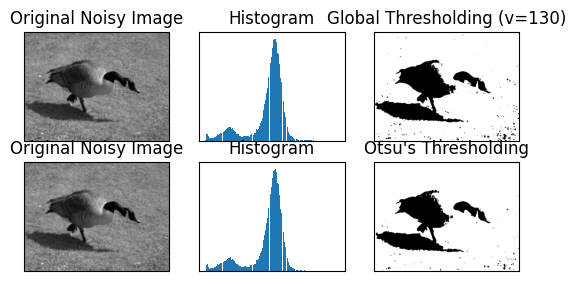

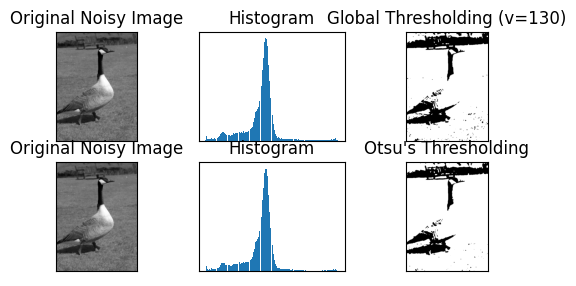

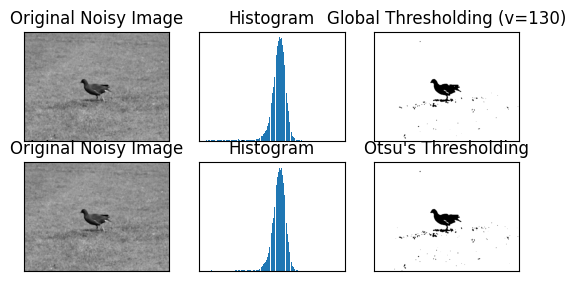

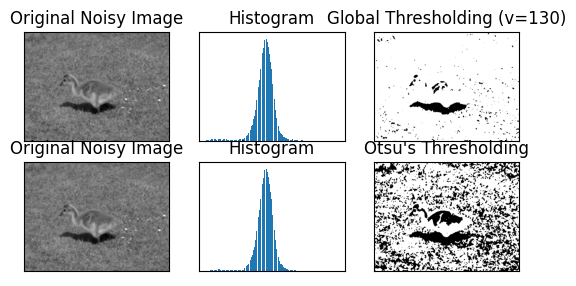

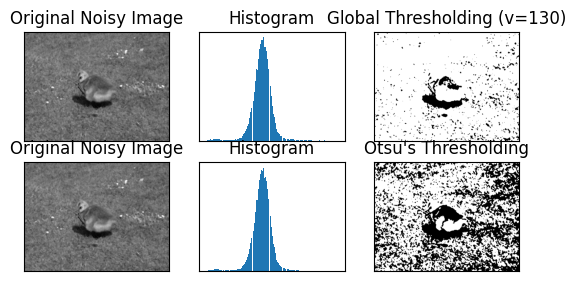

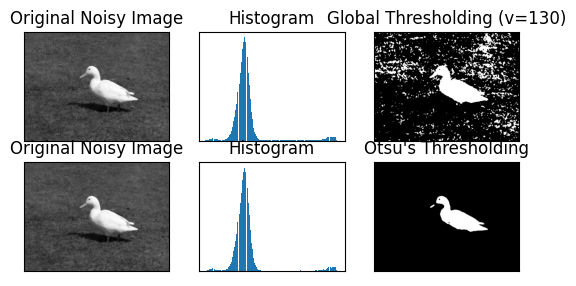

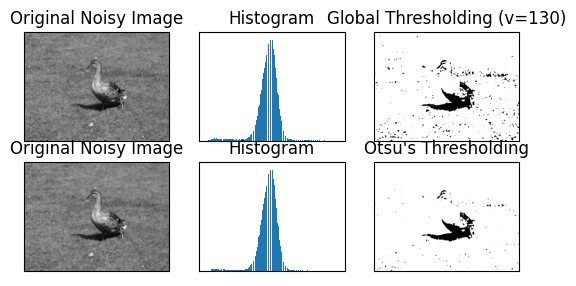

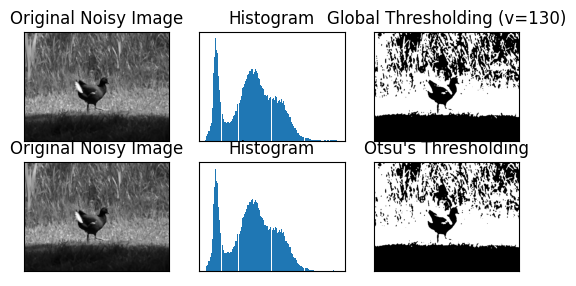

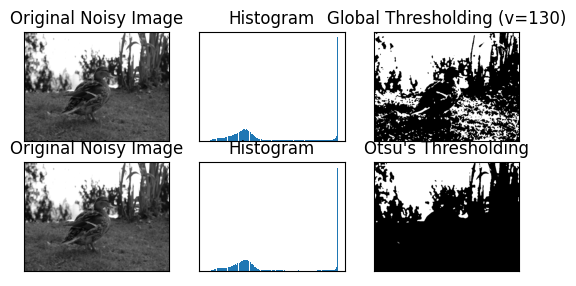

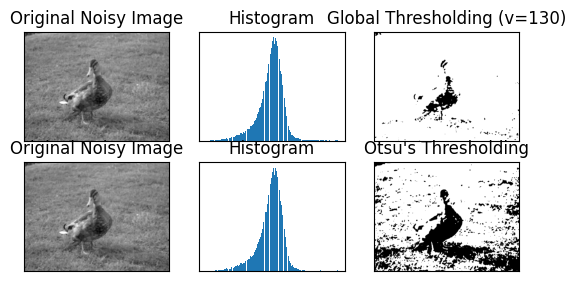

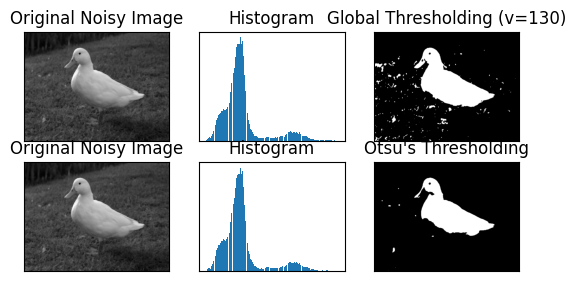

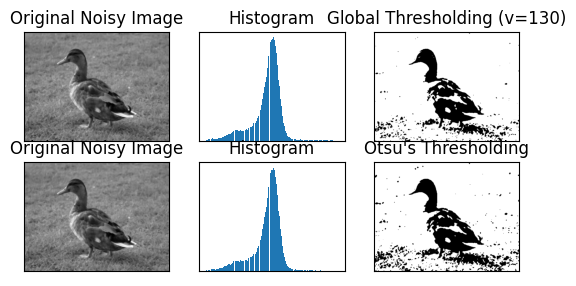

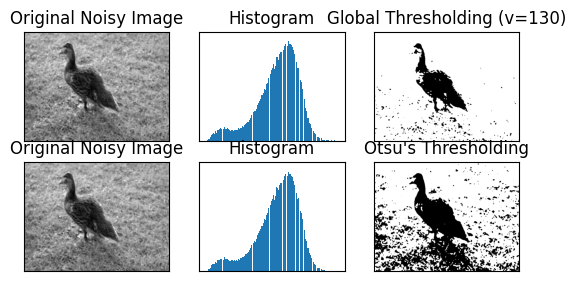

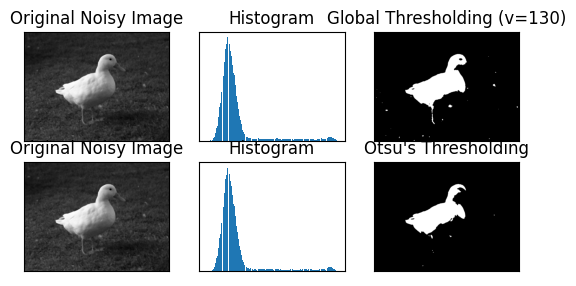

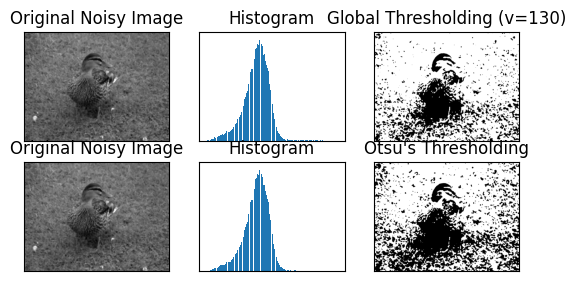

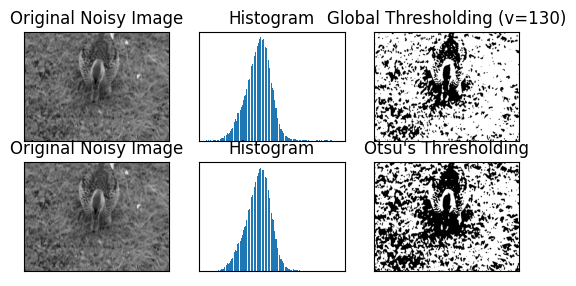

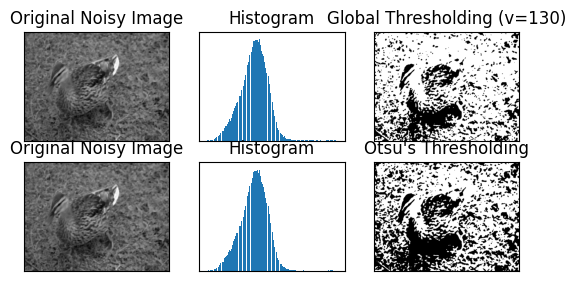

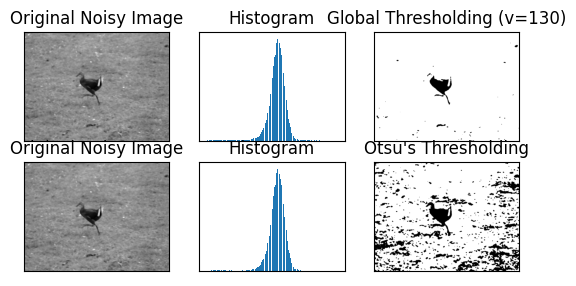

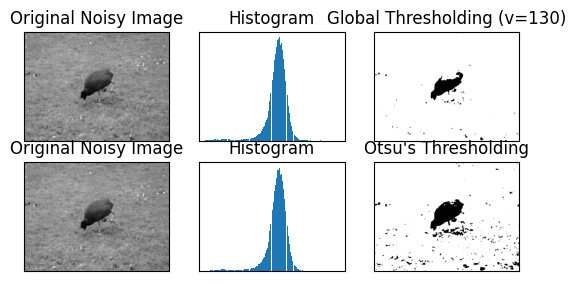

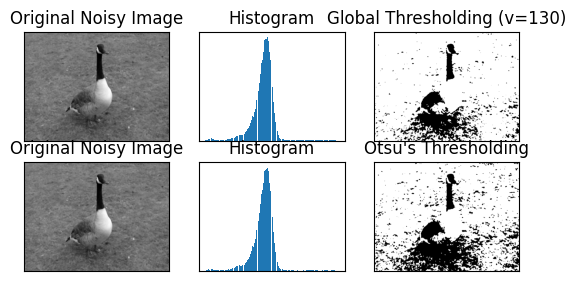

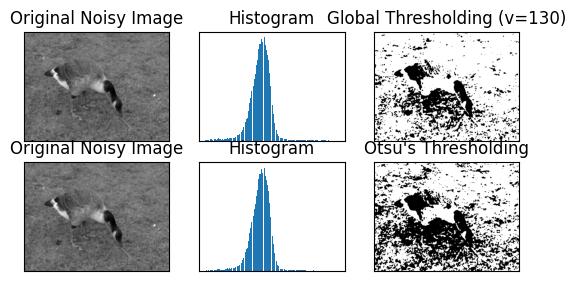

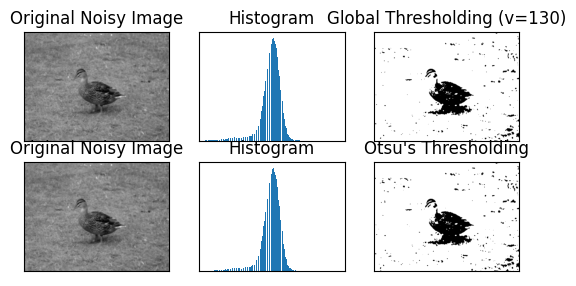

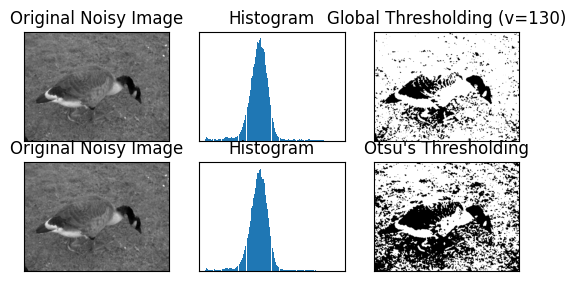

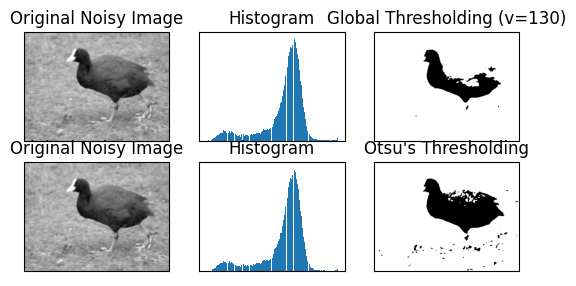

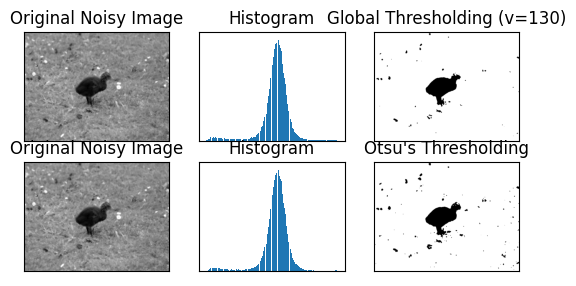

In [4]:
threshhold = []
for img in images:
    # global thresholding
    ret1,th1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)
    threshhold.append(th1)
    # Otsu's thresholding
    ret2,th2 = cv2.threshold(img,80,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    # plot all the images and their histograms
    s = [img, 0, th1,
            img, 0, th2]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=130)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding"]
    for i in range(2):
        plt.subplot(3,3,i*3+1),plt.imshow(s[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(s[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(s[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
props = []
for th in threshhold:
    props.append(measure.regionprops_table(
        th, properties=['area', 'area_bbox', 'area_convex', 'area_filled', 'axis_major_length', 'axis_minor_length'
                            ,'eccentricity','equivalent_diameter_area', 'euler_number', 'extent',
                             'feret_diameter_max','orientation', 'perimeter', 'perimeter_crofton', 'solidity']))
df1 = pd.DataFrame.from_dict(props)

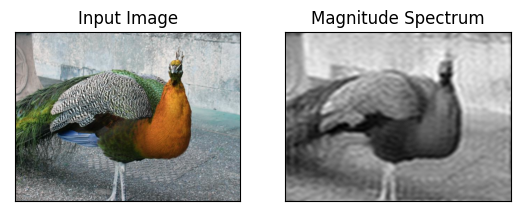

In [6]:
# find the discrete fourier transform of the image
temp = cv2.imread('./single/101_0119.JPG')
gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(gray),flags = cv2.DFT_COMPLEX_OUTPUT)

# hift zero-frequency component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
rows, cols = gray.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# visualize the images
plt.subplot(121),plt.imshow(temp, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
contrast = []
dissimilarity = []
homogeneity = []
energy = []
correlation = []
ASM = []
for img in images :
    graycom = feature.greycomatrix(img, [1], [0], levels=256)
    # Find the GLCM properties
    contrast.append(feature.greycoprops(graycom, 'contrast'))
    dissimilarity.append(feature.greycoprops(graycom, 'dissimilarity'))
    homogeneity.append(feature.greycoprops(graycom, 'homogeneity'))
    energy.append(feature.greycoprops(graycom, 'energy'))
    correlation.append(feature.greycoprops(graycom, 'correlation'))
    ASM.append(feature.greycoprops(graycom, 'ASM'))

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in v

In [7]:
df2 = pd.DataFrame({'energy' : energy , 'contrast' : contrast , 'ASM' : ASM , 'correlation' : correlation ,
                    'dissimilarity' : dissimilarity , 'homogenity' : homogeneity})

In [25]:
si = []
for img in images :
    sift = cv2.SIFT_create(nfeatures=15 , nOctaveLayers=3 , contrastThreshold=0.04 , edgeThreshold=10 , sigma=1.6)
    kp, des = sift.detectAndCompute(img, None)
    des = des.reshape(-1)
    si.append(des)

In [26]:
sift_df = pd.DataFrame(si)
sift_df = sift_df.drop(sift_df.columns[sift_df.isna().any()], axis=1)

In [27]:
pca = PCA(10)
sif = pca.fit_transform(sift_df)
sift_df = pd.DataFrame(sif)
sift_df.rename(columns={0:'sift_0' , 1:'sift_1' , 2:'sift_2' , 3:'sift_3' , 4:'sift_4',
                        5:'sift_5' , 6:'sift_6' , 7:'sift_7' ,8:'sift_8' , 9:'sift_9'} , inplace= True)
sift_df.head()

sift_0      sift_1      sift_2      sift_3      sift_4      sift_5  \
0  427.574646  244.955231 -216.806839  194.569931 -419.762878  291.017181   
1  -76.268234 -282.507446 -289.203400  226.722244 -102.416084 -230.125153   
2 -243.056503  118.018188 -181.825958   23.142567  197.334686 -114.794518   
3  397.451141  -16.243509  770.328247  -12.576442    5.165423  -64.281921   
4 -143.156754  120.009224  102.854515    7.911547  269.645752  560.908752   

       sift_6      sift_7      sift_8      sift_9  
0 -240.732132  -85.374802 -129.700806 -477.992584  
1 -316.929932 -157.529160 -497.317627  -45.188339  
2  184.462433   82.856232  180.203247 -251.580490  
3  263.379456  -24.540731 -398.521393   93.817848  
4 -299.034424  -65.957848 -373.333984  208.779709

In [32]:
dataframe = pd.concat([df1,df2], axis=1, ignore_index=False)
dataframe = dataframe.astype(float)
dataframe.head()

area  area_bbox  area_convex  area_filled  axis_major_length  \
0  274295.0   307200.0     307200.0     289767.0         741.442921   
1  227359.0   307200.0     307200.0     232223.0         762.442283   
2  175890.0   307200.0     300974.0     179214.0         755.064382   
3  242638.0   307200.0     304170.0     243629.0         769.371170   
4  280839.0   307200.0     307143.0     283592.0         736.069252   

   axis_minor_length  eccentricity  equivalent_diameter_area  euler_number  \
0         579.902789      0.623119                590.968054         -48.0   
1         591.751921      0.630577                538.035751         -71.0   
2         444.425848      0.808429                473.233667          14.0   
3         535.384326      0.718165                555.820382           9.0   
4         518.297477      0.710059                597.976020         -26.0   

     extent  ...  orientation     perimeter  perimeter_crofton  solidity  \
0  0.892887  ...     1.511119   7542.401692        7312.624808  0.892887   
1  0.740101  ...     1.399512  13309.398405       12959.422635  0.740101   
2  0.572559  ...     1.260059  10130.984879        9776.208244  0.584403   
3  0.789837  ...     1.341388   6777.224889        6533.420836  0.797705   
4  0.914189  ...    -1.558435   6054.815726        5704.652233  0.914359   

     energy   contrast       ASM  correlation  dissimilarity  homogenity  
0  0.036057  26.080539  0.001300     0.995097       2.591892    0.481790  
1  0.025636  60.338648  0.000657     0.989819       3.608783    0.426336  
2  0.042195  12.667407  0.001780     0.996807       1.675258    0.582831  
3  0.054329  17.932613  0.002952     0.996711       1.279483    0.686597  
4  0.066331   8.166373  0.004400     0.981466       1.623311    0.543842  

[5 rows x 21 columns]

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataframe)
dataframe = pd.DataFrame(scaled, columns=dataframe.columns.tolist())
dataframe.head()

area  area_bbox  area_convex  area_filled  axis_major_length  \
0  0.885409        1.0     1.000000     0.937636           0.854221   
1  0.717011        1.0     1.000000     0.731781           0.896408   
2  0.532350        1.0     0.968956     0.542150           0.881586   
3  0.771829        1.0     0.984892     0.772585           0.910328   
4  0.908887        1.0     0.999716     0.915546           0.843425   

   axis_minor_length  eccentricity  equivalent_diameter_area  euler_number  \
0           0.972529      0.091073                  0.923481      0.407970   
1           1.000000      0.114884                  0.802427      0.393422   
2           0.658437      0.682678                  0.654227      0.447185   
3           0.869317      0.394510                  0.843099      0.444023   
4           0.829702      0.368630                  0.939507      0.421885   

     extent  ...  orientation  perimeter  perimeter_crofton  solidity  \
0  0.882111  ...     0.981008   0.226662           0.239558  0.876626   
1  0.708868  ...     0.945482   0.441317           0.470602  0.695321   
2  0.518893  ...     0.901093   0.323012           0.340358  0.510562   
3  0.765264  ...     0.926981   0.198182           0.207677  0.763678   
4  0.906266  ...     0.003929   0.171293           0.173767  0.902105   

     energy  contrast       ASM  correlation  dissimilarity  homogenity  
0  0.052379  0.282001  0.009218     0.907240       0.476066    0.276200  
1  0.015564  0.675459  0.002241     0.772343       0.669873    0.195545  
2  0.074064  0.127950  0.014431     0.950946       0.301367    0.423155  
3  0.116930  0.188421  0.027141     0.948492       0.225937    0.574077  
4  0.159330  0.076255  0.042857     0.558844       0.291466    0.366450  

[5 rows x 21 columns]

In [34]:
kmeans = KMeans(n_clusters=5).fit(dataframe)
labels = pd.DataFrame({'cluster' : kmeans.labels_})
labels['name'] = name

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
pca = PCA(2)
df = pca.fit_transform(dataframe)
pca_df = pd.DataFrame(df)

In [36]:
kmeans2 = KMeans(n_clusters=5 , init = "k-means++")
lab = kmeans2.fit_predict(pca_df)
labels2 = pd.DataFrame({'cluster' : lab})
labels2['name'] = name

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
pca = PCA(11)
df = pca.fit_transform(dataframe)
pca_df2 = pd.DataFrame(df)
kmeans3 = KMeans(n_clusters=5 , init = "k-means++")
la = kmeans3.fit_predict(pca_df2)
labels3 = pd.DataFrame({'cluster' : la})
labels3['name'] = name
labels3

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster          name
0         0  101_0116.JPG
1         0  101_0119.JPG
2         0  101_0157.JPG
3         0  101_0161.JPG
4         3  110_1032.JPG
5         1  110_1071.JPG
6         1  111_1120.JPG
7         2  111_1167.JPG
8         2  111_1168.JPG
9         1  111_1173.JPG
10        1  111_1174.JPG
11        1  111_1177.JPG
12        4  111_1190.JPG
13        1  112_1275.JPG
14        1  117_1728.JPG
15        1  117_1729.JPG
16        1  117_1730.JPG
17        1  117_1731.JPG
18        0  155_5592.JPG
19        0  155_5593.JPG
20        0  155_5598.JPG
21        0  155_5599.JPG
22        3  155_5600.JPG
23        0  156_5601.JPG
24        4  156_5605.JPG
25        4  156_5606.JPG
26        0  161_6149.JPG
27        0  161_6154.JPG
28        2  163_6400.JPG
29        1  164_6401.JPG
30        0  164_6402.JPG
31        2  164_6466.JPG
32        2  164_6468.JPG
33        2  164_6469.JPG
34        0  164_6499.JPG
35        0  165_6501.JPG
36        0  165_6503.JPG
37        0  165_6504.JPG
38        3  165_6505.JPG
39        2  165_6506.JPG
40        3  165_6509.JPG
41        4  165_6511.JPG
42        4  165_6514.JPG
43        3  165_6515.JPG
44        2  165_6516.JPG
45        3  165_6517.JPG
46        3  165_6519.JPG
47        2  165_6521.JPG
48        4  179_7981.JPG
49        4  179_7982.JPG
50        4  179_7983.JPG
51        0  179_7986.JPG
52        3  179_7987.JPG
53        0  179_7988.JPG
54        4  179_7989.JPG
55        3  179_7990.JPG
56        4  179_7991.JPG
57        3  179_7992.JPG
58        0  179_7994.JPG

In [37]:
pca_df[1][0]

0.1698698050384845

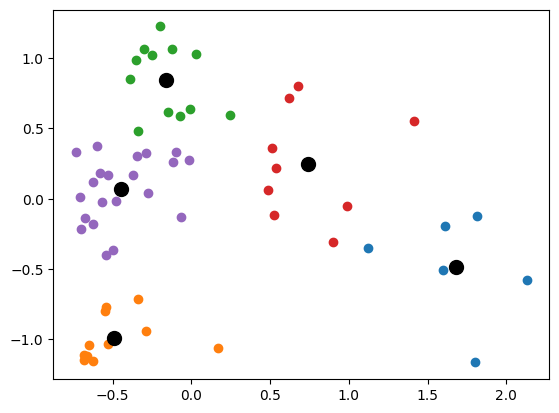

In [19]:
for i in range (5):
    plt.scatter(pca_df[lab==i][0] , pca_df[lab==i][1] , label = labels2['cluster'][i])
plt.scatter(kmeans2.cluster_centers_[:,0] , kmeans2.cluster_centers_[:,1] , c='black' , s=100)
plt.show()

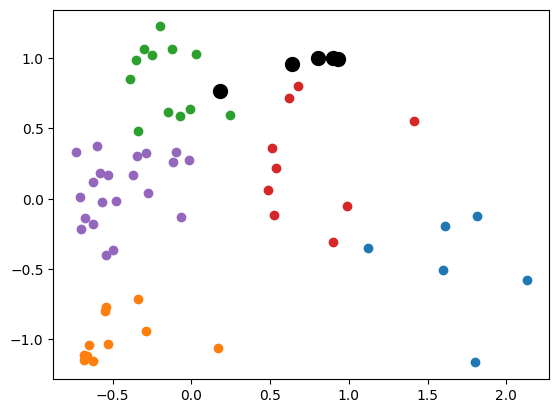

In [20]:
for i in range (5):
    plt.scatter(pca_df[lab==i][0] , pca_df[lab==i][1] , label = labels['cluster'][i])
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , c='black' , s=100)
plt.show()

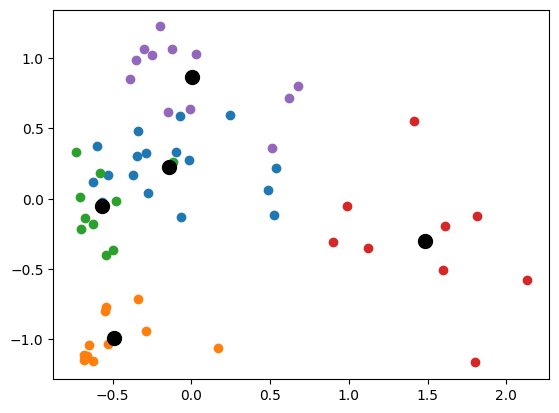

In [21]:
for i in range (5):
    plt.scatter(pca_df2[la==i][0] , pca_df2[la==i][1] , label = labels3['cluster'][i])
plt.scatter(kmeans3.cluster_centers_[:,0] , kmeans3.cluster_centers_[:,1] , c='black' , s=100)
plt.show()

In [29]:
dataframe_sift = pd.concat([df1,df2,sift_df], axis=1, ignore_index=False)
dataframe_sift = dataframe_sift.astype(float)
scaled = scaler.fit_transform(dataframe_sift)
dataframe_sift = pd.DataFrame(scaled, columns=dataframe_sift.columns.tolist())
dataframe_sift.head()

area  area_bbox  area_convex  area_filled  axis_major_length  \
0  0.885409        1.0     1.000000     0.937636           0.854221   
1  0.717011        1.0     1.000000     0.731781           0.896408   
2  0.532350        1.0     0.968956     0.542150           0.881586   
3  0.771829        1.0     0.984892     0.772585           0.910328   
4  0.908887        1.0     0.999716     0.915546           0.843425   

   axis_minor_length  eccentricity  equivalent_diameter_area  euler_number  \
0           0.972529      0.091073                  0.923481      0.407970   
1           1.000000      0.114884                  0.802427      0.393422   
2           0.658437      0.682678                  0.654227      0.447185   
3           0.869317      0.394510                  0.843099      0.444023   
4           0.829702      0.368630                  0.939507      0.421885   

     extent  ...    sift_0    sift_1    sift_2    sift_3    sift_4    sift_5  \
0  0.882111  ...  0.692175  0.677630  0.278781  0.658943  0.056205  0.755031   
1  0.708868  ...  0.416987  0.253349  0.225887  0.686997  0.384584  0.282011   
2  0.518893  ...  0.325890  0.575525  0.304339  0.509362  0.694755  0.386692   
3  0.765264  ...  0.675722  0.467527  1.000000  0.478195  0.495905  0.432540   
4  0.906266  ...  0.380453  0.577126  0.512332  0.496072  0.769580  1.000000   

     sift_6    sift_7    sift_8    sift_9  
0  0.235485  0.364806  0.340845  0.000000  
1  0.161772  0.312105  0.000000  0.427109  
2  0.646818  0.487681  0.628179  0.223433  
3  0.723162  0.409239  0.091601  0.564286  
4  0.179084  0.378988  0.114954  0.677735  

[5 rows x 31 columns]